In [8]:
import numpy as np
import pandas as pd
import matplotlib as mp
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
fm = mp.font_manager.FontManager()
# 한글지원하는 폰트명으로 재할당
#plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rc('font',family='Malgun Gothic')

df_health : 건강행태 데이터  
df_area : 1차 가공 공원 종류별 면적 데이터  
df_area2 : 2차 가공 공원 면적 데이터(순수 면적)  
df_count : 2차 가공 공원 개수 데이터(순수 개수)

### 데이터 불러오기

In [81]:
df_health = pd.read_csv(r'C:\Users\User\Desktop\datastudy\project\first_project\walk-with-me\raw/서울시 지역사회 건강통계(건강행태) 통계(08-20).txt', encoding='UTF8', sep='\t') # 인코딩으로 안되면, engine='python'이라고 추가해주면 됨
print(df_health.value_counts(['기간']))
df_health.head()
#df_health.tail()

기간  
2008    26
2009    26
2010    26
2011    26
2012    26
2013    26
2014    26
2015    26
2016    26
2017    26
2018    26
2019    26
2020    26
기간       1
dtype: int64


,기간,지역,흡연,흡연.1,음주,음주.1,신체활동,신체활동.1,비만율,정신건강,정신건강.1,양호한 주관적 건강수준 인지율
0,기간,지역,현재흡연율,현재흡연자의 금연시도율,월간음주율,연간음주자의 고위험음주율,걷기실천율,증등도 이상 신체활동 실천율,비만율,스트레스 인지율,우울감 경험률,양호한 주관적 건강수준 인지율
1,2008,서울시,24.2,-,57.7,20.3,57.4,-,20.6,30.4,8.2,50.9
2,2008,종로구,22.2,-,56.7,22.1,59.9,-,16.4,25.1,7.9,57.2
3,2008,중구,25.2,-,55.3,14.1,77.7,-,16.7,14.8,2.8,55.8
4,2008,용산구,26.5,-,53.4,24.6,48.3,-,19.9,39.2,8,50


In [88]:
df_area = pd.read_csv(r'C:\Users\User\Desktop\datastudy\project\first_project\walk-with-me\raw/서울시 공원 (1인당 공원면적) 통계(08-19).txt', encoding='UTF8', sep='\t') # 인코딩으로 안되면, engine='python'이라고 추가해주면 됨
print(df_area.value_counts(['기간']))
df_area.head()
#df_area.tail()

기간  
2008    27
2009    27
2010    27
2011    27
2012    27
2013    27
2014    27
2015    27
2016    27
2017    27
2018    27
2019    27
기간       2
dtype: int64


,기간,자치구,공원(1인당공원면적),공원(1인당공원면적).1,공원(1인당공원면적).2,공원(1인당공원면적).3,공원(1인당공원면적).4,공원(1인당공원면적).5
0,기간,자치구,공원,공원,도시공원,도시공원,생활권 공원,생활권 공원
1,기간,자치구,면적,1인당공원면적,면적,1인당도시공원면적,면적,1인당생활권공원면적
2,2008,서울시,"168,151.0",16.1,"112,511.0",10.8,"56,696.0",5
3,2008,종로구,"10,653.0",61.3,"6,243.0",35.9,"2,888.0",61.3
4,2008,중구,"1,855.0",14.2,"1,834.0",14.1,437,14.2


In [116]:
df_count = pd.read_csv(r'C:\Users\User\Desktop\datastudy\project\first_project\walk-with-me\raw/서울시 공원 통계(2013-19).txt', encoding='UTF8', sep='\t') # 인코딩으로 안되면, engine='python'이라고 추가해주면 됨
print(df_count.value_counts(['기간']))
df_count.head()
#df_count.tail()

기간  
2013    27
2014    27
2015    27
2016    27
2017    27
2018    27
2019    27
기간       2
dtype: int64


,기간,자치구,계,계.1,계.2,자연공원,자연공원.1,자연공원.2,도시공원,도시공원.1,...,도시공원.20,도시공원.21,도시공원.22,도시공원.23,도시공원.24,도시공원.25,도시공원.26,기타공원,기타공원.1,기타공원.2
0,기간,자치구,계,계,계,자연공원,자연공원,자연공원,소계,소계,...,역사공원,수변공원,수변공원,생태공원,생태공원,가로공원,가로공원,기타공원,기타공원,기타공원
1,기간,자치구,공원수,(중복),면적,공원수,(중복),면적,공원수,(중복),...,면적,공원수,면적,공원수,면적,공원수,면적,공원수,(중복),면적
2,2013,합계,"2,782",34,"170,080.9",1,5,"37,345.0","2,155",26,...,416.1,8,80.9,1,51.5,1,2.4,626,3,"16,988.6"
3,2013,종로구,114,2,"11,575.4",-,1,"4,998.0",75,1,...,109.4,-,-,-,-,-,-,39,-,126.9
4,2013,중구,68,2,"3,128.1",-,-,-,57,2,...,-,-,-,-,-,-,-,11,-,49.6


공원개수 중복은? -> 무시해도 됟지 않을까? 전제 공원개수에서 중복수가 차지하는 비율이 높지 않은 것으롭 보임  
순수하게 중복값 제외 한 공원개수, 면적으로만 비교  
추가적으로 공원 종류에 대해서도 확인해봐도 될듯

### 데이터 편집

In [82]:
# 열 삭제
df_health.drop(['흡연','흡연.1','음주','음주.1'], axis='columns', inplace=True) 
df_health.head()
#df_health.tail()

,기간,지역,신체활동,신체활동.1,비만율,정신건강,정신건강.1,양호한 주관적 건강수준 인지율
0,기간,지역,걷기실천율,증등도 이상 신체활동 실천율,비만율,스트레스 인지율,우울감 경험률,양호한 주관적 건강수준 인지율
1,2008,서울시,57.4,-,20.6,30.4,8.2,50.9
2,2008,종로구,59.9,-,16.4,25.1,7.9,57.2
3,2008,중구,77.7,-,16.7,14.8,2.8,55.8
4,2008,용산구,48.3,-,19.9,39.2,8,50


In [83]:
# 열 이름 수정하기
df_health.rename(columns={'신체활동':'걷기실천율'}, inplace=True)
df_health.rename(columns={'신체활동.1':'증등도 이상 신체활동 실천율'}, inplace=True)
df_health.rename(columns={'정신건강':'스트레스 인지율'}, inplace=True)
df_health.rename(columns={'정신건강.1':'우울감 경험률'}, inplace=True)

In [84]:
# 행 삭제
df_health.drop(index=0, axis=0, inplace=True)
df_health.head()

,기간,지역,걷기실천율,증등도 이상 신체활동 실천율,비만율,스트레스 인지율,우울감 경험률,양호한 주관적 건강수준 인지율
1,2008,서울시,57.4,-,20.6,30.4,8.2,50.9
2,2008,종로구,59.9,-,16.4,25.1,7.9,57.2
3,2008,중구,77.7,-,16.7,14.8,2.8,55.8
4,2008,용산구,48.3,-,19.9,39.2,8,50
5,2008,성동구,63.4,-,19.8,24.1,7.9,47.9


In [101]:
# 칼럼명 변경
df_area.columns=['기간','자치구','공원면적','1인당공원면적','도시공원면적','1인당도시공원면적','생활권공원면적','1인당생활권공원면적']
df_area.head()

,기간,자치구,공원면적,1인당공원면적,도시공원면적,1인당도시공원면적,생활권공원면적,1인당생활권공원면적
2,2008,서울시,"168,151.0",16.1,"112,511.0",10.8,"56,696.0",5
3,2008,종로구,"10,653.0",61.3,"6,243.0",35.9,"2,888.0",61.3
4,2008,중구,"1,855.0",14.2,"1,834.0",14.1,437,14.2
5,2008,용산구,"2,564.0",10.3,"1,938.0",7.8,"1,285.0",10.3
6,2008,성동구,"2,955.0",8.7,"1,021.0",3,"2,949.0",8.7


In [99]:
# 행 삭제
#df_area.drop(index=[0,1], axis=0, inplace=True)
#df_area.head()

,기간,자치구,공원(1인당공원면적),공원(1인당공원면적).1,공원(1인당공원면적).2,공원(1인당공원면적).3,공원(1인당공원면적).4,공원(1인당공원면적).5
2,2008,서울시,"168,151.0",16.1,"112,511.0",10.8,"56,696.0",5
3,2008,종로구,"10,653.0",61.3,"6,243.0",35.9,"2,888.0",61.3
4,2008,중구,"1,855.0",14.2,"1,834.0",14.1,437,14.2
5,2008,용산구,"2,564.0",10.3,"1,938.0",7.8,"1,285.0",10.3
6,2008,성동구,"2,955.0",8.7,"1,021.0",3,"2,949.0",8.7


In [102]:
df_area2 = df_area.drop(['도시공원면적','1인당도시공원면적','생활권공원면적','1인당생활권공원면적'], axis='columns') 
df_area2.head()

,기간,자치구,공원면적,1인당공원면적
2,2008,서울시,"168,151.0",16.1
3,2008,종로구,"10,653.0",61.3
4,2008,중구,"1,855.0",14.2
5,2008,용산구,"2,564.0",10.3
6,2008,성동구,"2,955.0",8.7


In [123]:
df_count = df_count.iloc[:,0:5]
df_count.drop(index=[2], axis=0, inplace=True)
df_count.head()

C:\Users\User\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,기간,자치구,공원수,중복수,공원면적
3,2013,종로구,114,2,"11,575.4"
4,2013,중구,68,2,"3,128.1"
5,2013,용산구,101,1,"1,796.0"
6,2013,성동구,80,1,"3,061.7"
7,2013,광진구,55,2,"3,395.6"


In [124]:
# 컬럼명 변경
df_count.columns = ['기간','자치구','공원수','중복수','공원면적']
df_count.head()

,기간,자치구,공원수,중복수,공원면적
3,2013,종로구,114,2,"11,575.4"
4,2013,중구,68,2,"3,128.1"
5,2013,용산구,101,1,"1,796.0"
6,2013,성동구,80,1,"3,061.7"
7,2013,광진구,55,2,"3,395.6"


### 정리 데이터

In [127]:
df_health.head()

,기간,지역,걷기실천율,증등도 이상 신체활동 실천율,비만율,스트레스 인지율,우울감 경험률,양호한 주관적 건강수준 인지율
1,2008,서울시,57.4,-,20.6,30.4,8.2,50.9
2,2008,종로구,59.9,-,16.4,25.1,7.9,57.2
3,2008,중구,77.7,-,16.7,14.8,2.8,55.8
4,2008,용산구,48.3,-,19.9,39.2,8,50
5,2008,성동구,63.4,-,19.8,24.1,7.9,47.9


In [128]:
df_count.head()

,기간,자치구,공원수,중복수,공원면적
3,2013,종로구,114,2,"11,575.4"
4,2013,중구,68,2,"3,128.1"
5,2013,용산구,101,1,"1,796.0"
6,2013,성동구,80,1,"3,061.7"
7,2013,광진구,55,2,"3,395.6"


In [129]:
df_area2.head()

,기간,자치구,공원면적,1인당공원면적
2,2008,서울시,"168,151.0",16.1
3,2008,종로구,"10,653.0",61.3
4,2008,중구,"1,855.0",14.2
5,2008,용산구,"2,564.0",10.3
6,2008,성동구,"2,955.0",8.7


### 나름의 인사이트?
1. 다양한 공원 종류  
  공원 구분 기준을 명확히 파악하는 것도 힘들 뿐더러 이번 프로젝트에서 소화할 수 있는 수준이 아닐 것 같음  
2. 중복 데이터  
  공원 면적, 개수 데이터 모두 중복으로 체크되는 공원이 있는 것으로 보임  
    -> 위 1번도 함께 고려해 중복값을 뺀 전체 공원 개수, 면적만 고려하는건 어떨지?  
3. 특정 연도 지정?  
  각 행정구별 연도에 따른 건강행태, 공원개수/면적 추이를 확인해보고, 큰 변동이 있는지부터 확인 필요할 것으로 보임

## 그래프 시각화

(<Figure size 432x288 with 12 Axes>,
 array([[<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
        [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
        [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]],
       dtype=object))

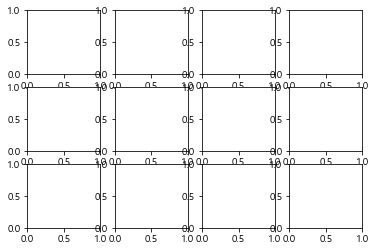

In [131]:
plt.subplots(3,4)
fig,axes = plt.subplots(2,2)

In [ ]:
df_health